In [106]:
#predicting apple stock price

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


In [107]:
ticker="AAPL"

stock_data=yf.download(ticker, start= "2020-01-01", end ="2025-03-01")

print(stock_data)

[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2020-01-02   72.716064   72.776591   71.466805   71.721011  135480400
2020-01-03   72.009109   72.771737   71.783954   71.941321  146322800
2020-01-06   72.582916   72.621654   70.876083   71.127873  118387200
2020-01-07   72.241554   72.849231   72.021238   72.592601  108872000
2020-01-08   73.403648   73.706279   71.943759   71.943759  132079200
...                ...         ...         ...         ...        ...
2025-02-24  247.100006  248.860001  244.419998  244.929993   51326400
2025-02-25  247.039993  250.000000  244.910004  248.000000   48013300
2025-02-26  240.360001  244.979996  239.130005  244.330002   44433600
2025-02-27  237.300003  242.460007  237.059998  239.410004   41153600
2025-02-28  241.839996  242.089996  230.199997  236.949997   56796200

[1297 rows x 5 colu

In [108]:
#checking if we are having any null values
print(stock_data.isnull().sum())

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64


In [109]:
df=stock_data
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.716064,72.776591,71.466805,71.721011,135480400
2020-01-03,72.009109,72.771737,71.783954,71.941321,146322800
2020-01-06,72.582916,72.621654,70.876083,71.127873,118387200
2020-01-07,72.241554,72.849231,72.021238,72.592601,108872000
2020-01-08,73.403648,73.706279,71.943759,71.943759,132079200
...,...,...,...,...,...
2025-02-24,247.100006,248.860001,244.419998,244.929993,51326400
2025-02-25,247.039993,250.000000,244.910004,248.000000,48013300


In [110]:
#Simple moving averages for 10 day closing and 50 day closing
stock_data["SMA_10"]=stock_data["Close"].rolling(window=10).mean()
stock_data["SMA_50"]=stock_data["Close"].rolling(window=50).mean()

In [111]:
#EMA : Exponential Moving Average
stock_data["EMA_10"]=stock_data["Close"].ewm(span=10,adjust="False").mean()

<function matplotlib.pyplot.show(close=None, block=None)>

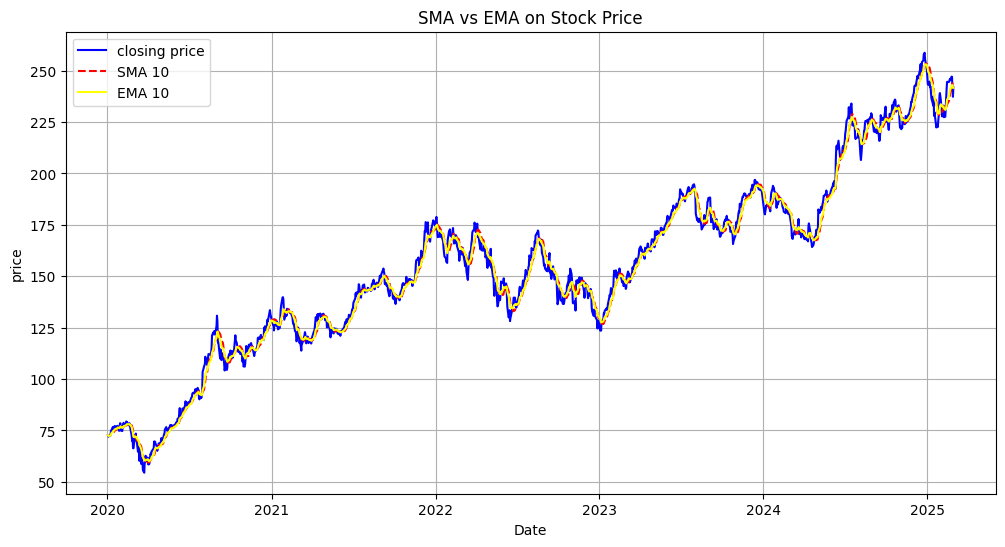

In [112]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(stock_data["Close"],label="closing price", color="blue")

#plot 10 day SMA and EMA

plt.plot(stock_data["SMA_10"], label="SMA 10", color="red" , linestyle="dashed")

plt.plot(stock_data["EMA_10"], label="EMA 10" ,color="yellow")

plt.xlabel("Date")
plt.ylabel("price")
plt.title("SMA vs EMA on Stock Price")
plt.legend()
plt.grid(True)
plt.show


In [113]:
print(stock_data.head())  # Check first few rows
print(stock_data.columns)  # Check column names
print(type(stock_data))  # Ensure it's a DataFrame


Price           Close       High        Low       Open     Volume SMA_10  \
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL          
Date                                                                       
2020-01-02  72.716064  72.776591  71.466805  71.721011  135480400    NaN   
2020-01-03  72.009109  72.771737  71.783954  71.941321  146322800    NaN   
2020-01-06  72.582916  72.621654  70.876083  71.127873  118387200    NaN   
2020-01-07  72.241554  72.849231  72.021238  72.592601  108872000    NaN   
2020-01-08  73.403648  73.706279  71.943759  71.943759  132079200    NaN   

Price      SMA_50     EMA_10  
Ticker                        
Date                          
2020-01-02    NaN  72.716064  
2020-01-03    NaN  72.327239  
2020-01-06    NaN  72.430020  
2020-01-07    NaN  72.367929  
2020-01-08    NaN  72.665256  
MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('V

In [114]:
# Flatten MultiIndex by joining column levels
stock_data.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in stock_data.columns]
stock_data.head()

,Close_AAPL,High_AAPL,Low_AAPL,Open_AAPL,Volume_AAPL,SMA_10_,SMA_50_,EMA_10_
Date,,,,,,,,
2020-01-02,72.716064,72.776591,71.466805,71.721011,135480400,NaN,NaN,72.716064
2020-01-03,72.009109,72.771737,71.783954,71.941321,146322800,NaN,NaN,72.327239
2020-01-06,72.582916,72.621654,70.876083,71.127873,118387200,NaN,NaN,72.430020
2020-01-07,72.241554,72.849231,72.021238,72.592601,108872000,NaN,NaN,72.367929
2020-01-08,73.403648,73.706279,71.943759,71.943759,132079200,NaN,NaN,72.665256


In [115]:
stock_data.head()

,Close_AAPL,High_AAPL,Low_AAPL,Open_AAPL,Volume_AAPL,SMA_10_,SMA_50_,EMA_10_
Date,,,,,,,,
2020-01-02,72.716064,72.776591,71.466805,71.721011,135480400,NaN,NaN,72.716064
2020-01-03,72.009109,72.771737,71.783954,71.941321,146322800,NaN,NaN,72.327239
2020-01-06,72.582916,72.621654,70.876083,71.127873,118387200,NaN,NaN,72.430020
2020-01-07,72.241554,72.849231,72.021238,72.592601,108872000,NaN,NaN,72.367929
2020-01-08,73.403648,73.706279,71.943759,71.943759,132079200,NaN,NaN,72.665256


In [116]:
print(stock_data.dtypes)


Close_AAPL     float64
High_AAPL      float64
Low_AAPL       float64
Open_AAPL      float64
Volume_AAPL      int64
SMA_10_        float64
SMA_50_        float64
EMA_10_        float64
dtype: object


In [117]:
print(stock_data.isnull().sum())


Close_AAPL      0
High_AAPL       0
Low_AAPL        0
Open_AAPL       0
Volume_AAPL     0
SMA_10_         9
SMA_50_        49
EMA_10_         0
dtype: int64


In [118]:
stock_data["SMA_10_"] = stock_data["SMA_10_"].fillna(stock_data["Close_AAPL"])
stock_data["SMA_50_"] = stock_data["SMA_50_"].fillna(stock_data["Close_AAPL"])


In [119]:
stock_data.head()

,Close_AAPL,High_AAPL,Low_AAPL,Open_AAPL,Volume_AAPL,SMA_10_,SMA_50_,EMA_10_
Date,,,,,,,,
2020-01-02,72.716064,72.776591,71.466805,71.721011,135480400,72.716064,72.716064,72.716064
2020-01-03,72.009109,72.771737,71.783954,71.941321,146322800,72.009109,72.009109,72.327239
2020-01-06,72.582916,72.621654,70.876083,71.127873,118387200,72.582916,72.582916,72.430020
2020-01-07,72.241554,72.849231,72.021238,72.592601,108872000,72.241554,72.241554,72.367929
2020-01-08,73.403648,73.706279,71.943759,71.943759,132079200,73.403648,73.403648,72.665256


In [120]:
#Bollinger Bands

import pandas as pd

# Assuming 'stock_data' is your DataFrame with 'Close_AAPL' as the closing price column
window = 20  # 20-day moving average

# Calculate SMA (Simple Moving Average)
stock_data["SMA_20"] = stock_data["Close_AAPL"].rolling(window=window).mean()

# Calculate Standard Deviation
stock_data["STD_20"] = stock_data["Close_AAPL"].rolling(window=window).std()

# Calculate Upper and Lower Bollinger Bands
stock_data["Upper_Band"] = stock_data["SMA_20"] + (2 * stock_data["STD_20"])
stock_data["Lower_Band"] = stock_data["SMA_20"] - (2 * stock_data["STD_20"])

# Display the first few rows to verify
print(stock_data[["Close_AAPL", "SMA_20", "Upper_Band", "Lower_Band"]].head(25))


            Close_AAPL     SMA_20  Upper_Band  Lower_Band
Date                                                     
2020-01-02   72.716064        NaN         NaN         NaN
2020-01-03   72.009109        NaN         NaN         NaN
2020-01-06   72.582916        NaN         NaN         NaN
2020-01-07   72.241554        NaN         NaN         NaN
2020-01-08   73.403648        NaN         NaN         NaN
2020-01-09   74.962791        NaN         NaN         NaN
2020-01-10   75.132278        NaN         NaN         NaN
2020-01-13   76.737419        NaN         NaN         NaN
2020-01-14   75.701225        NaN         NaN         NaN
2020-01-15   75.376808        NaN         NaN         NaN
2020-01-16   76.320984        NaN         NaN         NaN
2020-01-17   77.165962        NaN         NaN         NaN
2020-01-21   76.643013        NaN         NaN         NaN
2020-01-22   76.916573        NaN         NaN         NaN
2020-01-23   77.287003        NaN         NaN         NaN
2020-01-24   7

In [121]:
stock_data=stock_data.dropna()


In [122]:

# Display the first few rows to verify
print(stock_data[["Close_AAPL", "SMA_20", "Upper_Band", "Lower_Band"]].head(25))


            Close_AAPL     SMA_20  Upper_Band  Lower_Band
Date                                                     
2020-01-30   78.410378  75.545424   79.596119   71.494730
2020-01-31   74.933754  75.656309   79.496856   71.815762
2020-02-03   74.727951  75.792251   79.263993   72.320508
2020-02-04   77.195000  76.022855   79.196962   72.848748
2020-02-05   77.824471  76.302001   79.025976   73.578026
2020-02-06   78.734787  76.568558   79.137282   73.999834
2020-02-07   77.664558  76.703646   79.199954   74.207338
2020-02-10   78.033440  76.848704   79.297257   74.400151
2020-02-11   77.562637  76.889965   79.358353   74.421577
2020-02-12   79.404579  77.075133   79.717536   74.432729
2020-02-13   78.839142  77.248249   79.875794   74.620705
2020-02-14   78.858551  77.375128   80.058615   74.691641
2020-02-18   77.414612  77.387560   80.069270   74.705850
2020-02-19   78.535797  77.482199   80.186773   74.777626
2020-02-20   77.730072  77.522874   80.216076   74.829673
2020-02-21   7

In [123]:
#Define features and target variable

features= ["SMA_20", "Upper_Band", "Lower_Band"]
target="Close_AAPL"

In [124]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X=stock_data[features]
Y=stock_data[target]

#split traing and testing sets


X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)


#Train a simple Linear regression model

model=LinearRegression()
model.fit(X_train,Y_train)

#Make predictions on the test set

Y_pred=model.predict(X_test)

In [125]:
# Compute RMSE correctly
rmse = mean_squared_error(Y_test, Y_pred) ** 0.5
print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 6.429812328902208


In [126]:
#lets add more features to improve RMSE

In [146]:
# Fixing the SettingWithCopyWarning issue
stock_data.loc[:, "EMA_20"] = stock_data["Close_AAPL"].ewm(span=20, adjust=False).mean()
stock_data.loc[:, "RSI_14"] = 100 - (100 / (1 + rs))
stock_data.loc[:, "MACD"] = ema_12 - ema_26
stock_data.loc[:, "Momentum_10"] = stock_data["Close_AAPL"].pct_change(periods=10)



In [132]:
stock_data.dropna()

,Close_AAPL,High_AAPL,Low_AAPL,Open_AAPL,Volume_AAPL,SMA_10_,SMA_50_,EMA_10_,SMA_20,STD_20,Upper_Band,Lower_Band,EMA_20,RSI_14,MACD,Momentum_10
Date,,,,,,,,,,,,,,,,
2020-02-19,78.535797,78.766345,77.657300,77.657300,93984000,78.287257,78.535797,78.083958,77.482199,1.352287,80.186773,74.777626,78.093655,50.429782,0.053021,0.017369
2020-02-20,77.730072,78.785727,77.222874,78.295518,100566000,78.277818,77.730072,78.019545,77.522874,1.346601,80.216076,74.829673,78.059028,47.790759,0.015599,-0.001213
2020-02-21,75.970673,77.766503,75.351844,77.322397,129554000,78.001406,75.970673,77.646691,77.457058,1.390199,80.237455,74.676661,77.860137,53.790021,-0.154249,-0.035107
2020-02-24,72.362007,73.818081,70.190035,72.138747,222195200,77.471151,72.362007,76.685138,77.221945,1.797953,80.817852,73.626038,77.336505,43.074928,-0.573433,-0.068275
2020-02-25,69.910980,73.417696,69.437761,73.034266,230673600,76.658905,69.910980,75.452738,76.977584,2.381966,81.741516,72.213653,76.629312,28.659802,-1.090843,-0.104089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-24,247.100006,248.860001,244.419998,244.929993,51326400,241.109000,240.485810,242.164807,237.186266,6.703257,250.592780,223.779753,239.208482,80.231290,2.668686,0.086727
2025-02-25,247.039993,250.000000,244.910004,248.000000,48013300,243.048000,240.476652,243.051205,238.057889,6.798621,251.655131,224.460646,239.954340,76.585168,2.931394,0.085175
2025-02-26,240.360001,244.979996,239.130005,244.330002,44433600,243.822000,240.359467,242.561895,238.175973,6.818014,251.812001,224.539944,239.992975,62.116289,2.570937,0.033273


In [138]:
X = X.dropna()

In [141]:

# Drop NaN values from rolling calculations
stock_data = stock_data.dropna()

# Define features and target variable
features = ["SMA_20", "Upper_Band", "Lower_Band", "EMA_20", "RSI_14", "MACD", "Momentum_10", "Volume_AAPL"]
target = "Close_AAPL"

X = stock_data[features]
y = stock_data[target]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred)**0.05
print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 1.0815813543524893


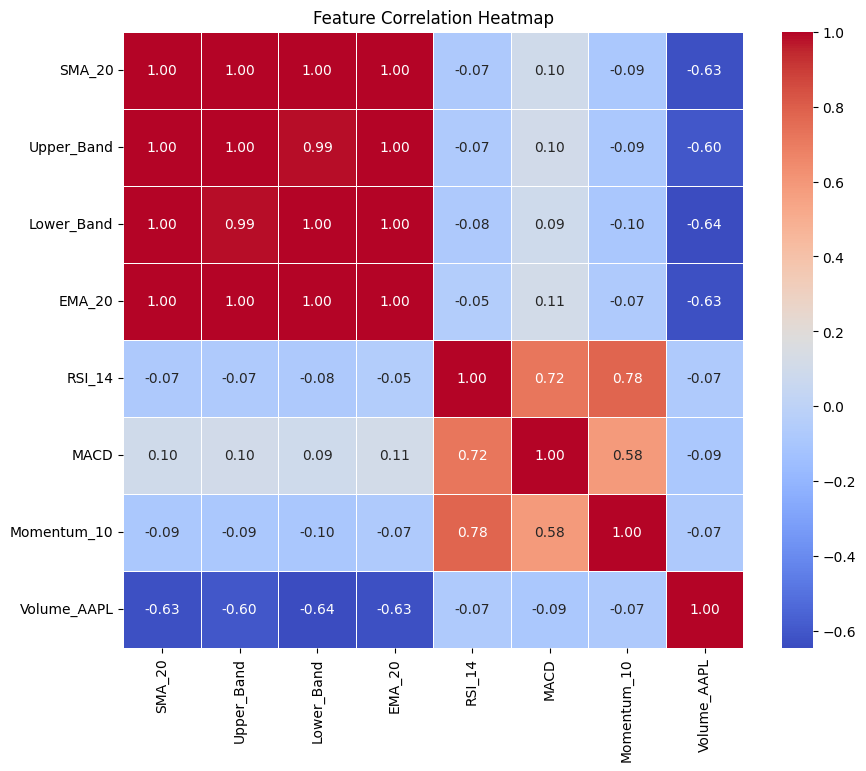

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt
X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


X shape: (1252, 5), y shape: (1252,)
Root Mean Squared Error: 1.4151857199665374


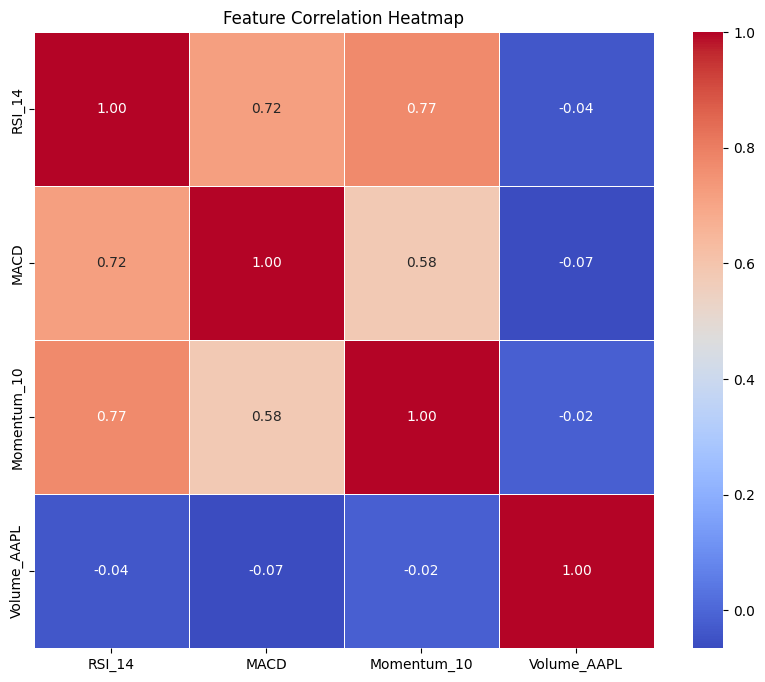

In [169]:
#dropping features based on correlation matrix
# Define features and target variable
# Drop rows where any NaN exists in features or target
stock_data = stock_data.dropna(subset=features + [target])

# Define features and target again after dropping NaNs
X = stock_data[features]
y = stock_data[target]

# Check for consistent shapes
print(f"X shape: {X.shape}, y shape: {y.shape}")

stock_data = stock_data.dropna()
features = [ "RSI_14", "MACD", "Momentum_10", "Volume_AAPL"]
target = "Close_AAPL"


X=stock_data[features]
Y=stock_data[target]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred)**0.05
print(f"Root Mean Squared Error: {rmse}")





X shape: (1249, 5), y shape: (1249,)
Root Mean Squared Error: 1.385462690690892


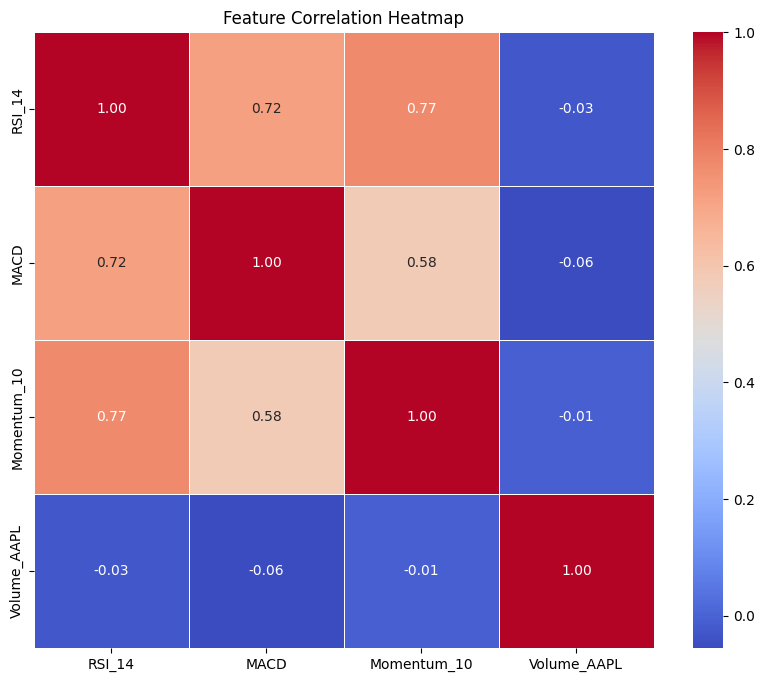

In [173]:
#we are exploring new model now
from sklearn.ensemble import RandomForestRegressor


stock_data['Lag_1'] = stock_data['Close_AAPL'].shift(1)


stock_data = stock_data.dropna(subset=features + [target])

# Define features and target again after dropping NaNs
X = stock_data[features]
y = stock_data[target]
# Check for consistent shapes
print(f"X shape: {X.shape}, y shape: {y.shape}")

stock_data = stock_data.dropna()
features = [ "RSI_14", "MACD", "Momentum_10", "Volume_AAPL"]
target = "Close_AAPL"
X = X.dropna()

X=stock_data[features]
Y=stock_data[target]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple Linear Regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred)**0.05
print(f"Root Mean Squared Error: {rmse}")


import seaborn as sns
import matplotlib.pyplot as plt
X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


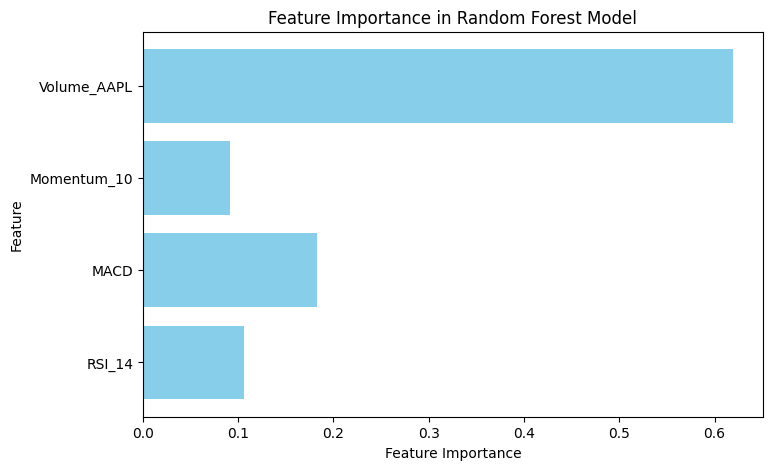

In [174]:
import matplotlib.pyplot as plt

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Plot feature importance
plt.figure(figsize=(8, 5))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest Model")
plt.show()


In [178]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}, R²: {r2}")


MAE: 19.854439192047117, R²: 0.5957119989333974


In [180]:
# Get the most recent row of data (last available trading day)
latest_data = stock_data.iloc[-1][features].values.reshape(1, -1)

# Predict the next day's price
predicted_price = model.predict(latest_data)
print(f"Predicted Next Day's Price: {predicted_price[0]:.2f}")


Predicted Next Day's Price: 207.93


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
